# C++ Introduction - Functions

- syntax
  - return type, void
  - no nested functions
- scope (global variables)
- how functions work (stack frame)
- declaration and definition
- pass by value/reference
- default parameters
- function overloading

In [4]:
#include <iostream>
#include <string>
using namespace std;

In [12]:
int add(int a, int b) {
    return a + b;
}

In [13]:
add(7, 8)

15

In [14]:
#include <iostream>
#include <string>
using namespace std;

In [15]:
void print5x(string message) {
    cout << message << message << message << message << message << endl;
}

In [16]:
print5x("woot! ");

woot! woot! woot! woot! woot! 


### `function_demo.cpp`

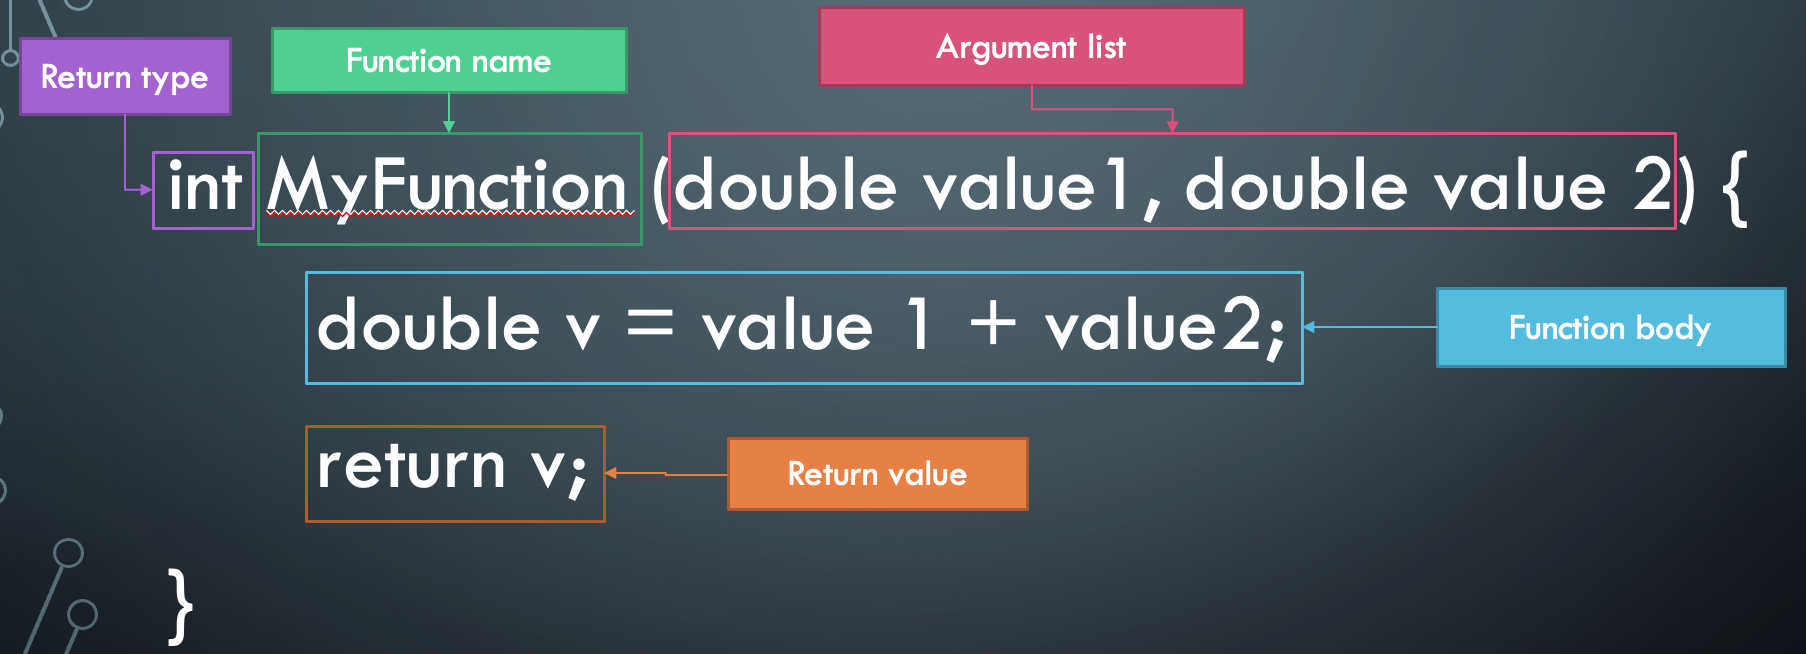

When we call a function, the following things happen:
- All the variables for the function we are currently in, as well as the position in the code where the function was called, are stored on the program stack
- Any arguments passed to the function are copied into a memory space for the new function
- The function executes, allocating memory for new variables as needed
- When the function returns, its memory is freed, the old function is reloaded into memory, the return value of the function is placed in the position of the function call, and execution of the old function resumes

In C++, functions cannot be defined in other functions.*

*_except for lambdas_.

In [17]:
void foo() {
    void bar() {
        
    }
}

input_line_32:2:16: error: function definition is not allowed here
    void bar() {
               ^


Interpreter Error: 

## Variable Scope

A function can use arguments and any variables defined in the root level of the file (i.e. *global* variables). 

### `scope_demo.cpp`

## Declaration and Definition

**Declaring** a function or variable is different from **defining** a function or **assigning** a variable a value.

Very often (in this class especially), you will declare and define a function at the same time.

Sometimes you need to declare a function and fill in the details later (e.g. in another file).

In [28]:
double divide_ints(int a, int b);  // <-- function DECLARATION. Implementation is left for later.

## References

In [1]:
int a = 7;
int& b = a;
b = 8;
a

8

A variable is simply an alias for a specific chunk of bytes.

A **reference** is simply *another* alias for the same chunk of bytes.

## Passing arguments

A **reference** is simply *another* alias for the same chunck of bytes.

### Pass by value

In [2]:
int magic(int a, int b) {
    a = 7;
    return a + b;
}

In [5]:
int x = 9;
int y = 10;
cout << magic(x, y) << endl;
cout << x << endl;

17
9


### Pass by reference

In [6]:
int more_magic(int& a, int b) {
    a = 7;
    return a + b;
}

In [7]:
int x = 9;
int y = 10;
cout << more_magic(x, y) << endl;
cout << x << endl;

17
7


### Const reference

In [8]:
int yet_more_magic(int const& a, int b) {
    a = 7;
    return a + b;
}

input_line_19:2:7: error: cannot assign to variable 'a' with const-qualified type 'const int &'
    a = 7;
    ~ ^
input_line_19:1:31: note: variable 'a' declared const here
int yet_more_magic(int const& a, int b) {
                   ~~~~~~~~~~~^


Interpreter Error: 

In [7]:
int x = 9;
int y = 10;
cout << more_magic(x, y) << endl;
cout << x << endl;

17
7


### Multiple return

In [9]:
void multi_return(int const& mid, int& out_less, int& out_more) {
    out_less = mid - 1;
    out_more = mid + 1;
}

In [10]:
int b = 7;
int a, c;
multi_return(b, a, c);
cout << a << ' ' << b << ' ' << c << endl;

6 7 8


Common reasons for passing by reference:

- You don't want to copy the bytes of the value being passed
  - e.g. the value is REALLY BIG
  - in this case, consider using a const reference to you don't accidentally modify your data
- You actually want the function to change your data
  - You'll see this a lot in certain datastructures (linked lists, trees)
  - Special case: multiple return
    - document (and even name) your variables so the intent is very clear

### Multiple return

In [9]:
void multi_return(int const& mid, int& less, int& more) {
    less = mid - 1;
    more = mid + 1;
}

In [10]:
int b = 7;
int a, c;
multi_return(b, a, c);
cout << a << ' ' << b << ' ' << c << endl;

6 7 8


## Default parameters

In [14]:
void say_something(string message, string something="something") {
    cout << message << ", and " << something << endl;
}

In [15]:
say_something("yep")

yep, and something


In [16]:
say_something("yep", "nope")

yep, and nope


### Default parameter rules:

- Default parameters come after all non-defaults
- These are not "keyword" arguments like python
  - you have to specify each argument in order
  - you can't skip any arguments

## Function Overloading

In [18]:
int add(int a, int b) {
    return a + b;
}

In [19]:
double add(double a, double b) {
    return a + b;
}

In [20]:
add(1, 8)

9

In [21]:
add(1.0, 8.0)

9.0000000

In [22]:
add(1.0, 8)

input_line_35:2:2: error: call to 'add' is ambiguous
 add(1.0, 8)
 ^~~
input_line_29:1:5: note: candidate function
int add(int a, int b) {
    ^
input_line_30:1:8: note: candidate function
double add(double a, double b) {
       ^


Interpreter Error: 

In [24]:
add(1.0, static_cast<double>(8))

9.0000000

## Key Ideas

- function syntax
  - return type, void
  - no nested functions
- scope (global variables)
- declaration and definition
- pass by value/reference
- default parameters
- function overloading